In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.shape

(3680, 18)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,raheja navodaya,sector 92,0.62,4806.0,2,2,2,5.0,New Property,1498.0,0,0,0,0,0,0,0
1,flat,paras quartier,gwal pahari,5.90,11028.0,4,4,3+,0.0,Moderately Old,5350.0,0,0,0,0,0,0,63
2,flat,signature global synera,sector 81,0.50,7886.0,2,2,1,11.0,New Property,704.0,0,0,0,0,0,2,97
3,flat,ss the leaf,sector 85,2.05,7290.0,4,4,3+,4.0,Relatively New,2500.0,0,1,0,0,0,1,49
4,flat,m3m heights,sector 65,1.99,15794.0,2,2,2,26.0,Relatively New,1140.0,0,0,0,0,0,0,48


In [5]:
train_df = df.drop(columns=['society', 'price_per_sqft'])

In [6]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 92,0.62,2,2,2,5.0,New Property,1498.0,0,0,0,0,0,0,0
1,flat,gwal pahari,5.90,4,4,3+,0.0,Moderately Old,5350.0,0,0,0,0,0,0,63
2,flat,sector 81,0.50,2,2,1,11.0,New Property,704.0,0,0,0,0,0,2,97
3,flat,sector 85,2.05,4,4,3+,4.0,Relatively New,2500.0,0,1,0,0,0,1,49
4,flat,sector 65,1.99,2,2,2,26.0,Relatively New,1140.0,0,0,0,0,0,0,48


<Axes: xlabel='luxury_score'>

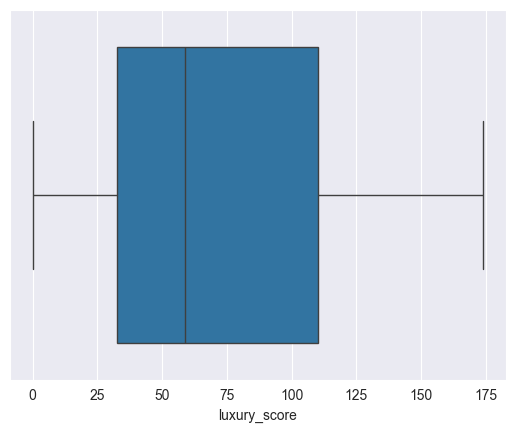

In [8]:
sns.boxplot(x=df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 92,0.62,2,2,2,5.0,New Property,1498.0,0,0,0,0,0,0,0,Low
1,flat,gwal pahari,5.90,4,4,3+,0.0,Moderately Old,5350.0,0,0,0,0,0,0,63,Medium
2,flat,sector 81,0.50,2,2,1,11.0,New Property,704.0,0,0,0,0,0,2,97,Medium
3,flat,sector 85,2.05,4,4,3+,4.0,Relatively New,2500.0,0,1,0,0,0,1,49,Low
4,flat,sector 65,1.99,2,2,2,26.0,Relatively New,1140.0,0,0,0,0,0,0,48,Low


<Axes: xlabel='floorNum'>

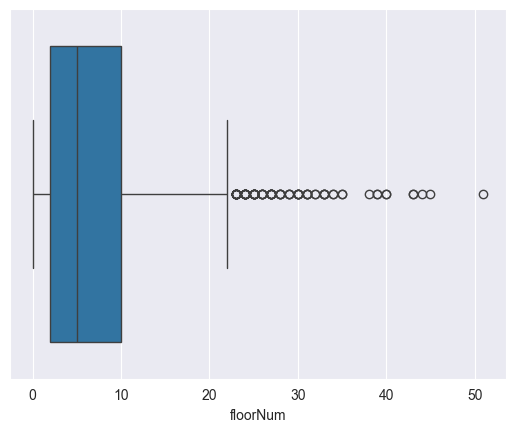

In [13]:
sns.boxplot(x=df['floorNum'])

In [14]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [15]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 92,0.62,2,2,2,5.0,New Property,1498.0,0,0,0,0,0,0,0,Low,Mid Floor
1,flat,gwal pahari,5.90,4,4,3+,0.0,Moderately Old,5350.0,0,0,0,0,0,0,63,Medium,Low Floor
2,flat,sector 81,0.50,2,2,1,11.0,New Property,704.0,0,0,0,0,0,2,97,Medium,High Floor
3,flat,sector 85,2.05,4,4,3+,4.0,Relatively New,2500.0,0,1,0,0,0,1,49,Low,Mid Floor
4,flat,sector 65,1.99,2,2,2,26.0,Relatively New,1140.0,0,0,0,0,0,0,48,Low,High Floor


In [17]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 92,0.62,2,2,2,New Property,1498.0,0,0,0,0,0,0,Low,Mid Floor
1,flat,gwal pahari,5.90,4,4,3+,Moderately Old,5350.0,0,0,0,0,0,0,Medium,Low Floor
2,flat,sector 81,0.50,2,2,1,New Property,704.0,0,0,0,0,0,2,Medium,High Floor
3,flat,sector 85,2.05,4,4,3+,Relatively New,2500.0,0,1,0,0,0,1,Low,Mid Floor
4,flat,sector 65,1.99,2,2,2,Relatively New,1140.0,0,0,0,0,0,0,Low,High Floor


In [19]:
from sklearn.preprocessing import OrdinalEncoder
data_label_encoded = train_df.copy()
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [20]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,107.0,2,2,2.0,1.0,1498.0,0,0,0,0,0,0,1.0,2.0
1,0.0,1.0,4,4,4.0,0.0,5350.0,0,0,0,0,0,0,2.0,1.0
2,0.0,94.0,2,2,1.0,1.0,704.0,0,0,0,0,0,2,2.0,0.0
3,0.0,99.0,4,4,4.0,3.0,2500.0,0,1,0,0,0,1,1.0,2.0
4,0.0,75.0,2,2,2.0,3.0,1140.0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,0.0,45.0,2,2,1.0,3.0,850.0,0,0,0,0,0,1,0.0,2.0
3676,0.0,41.0,2,2,3.0,1.0,85.0,0,0,0,0,0,0,2.0,2.0
3677,1.0,69.0,4,4,2.0,0.0,480.0,0,0,0,0,0,0,1.0,1.0
3678,1.0,33.0,5,6,4.0,0.0,4518.0,1,1,1,1,0,1,2.0,2.0


In [21]:
y_label

0        0.62
1        5.90
2        0.50
3        2.05
4        1.99
        ...  
3675     0.33
3676     1.08
3677     0.75
3678    15.00
3679     0.36
Name: price, Length: 3680, dtype: float64

Technique 1 - Correlation Analysis

<Axes: >

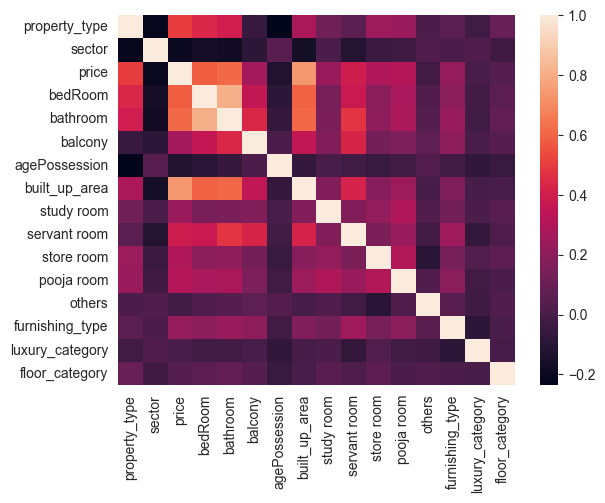

In [22]:
sns.heatmap(data_label_encoded.corr())

In [23]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.200098
1,price,1.000000
2,bedRoom,0.584726
3,bathroom,0.610386
4,balcony,0.271214
5,agePossession,-0.127620
6,built_up_area,0.738692
7,study room,0.239762
8,servant room,0.389981
9,store room,0.302230


Technique 2 - Random Forest Feature Importance

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label,y_label)

fi_df2 = pd.DataFrame({
    'feature' : X_label.columns,
    'rf_importance' : rf_label.feature_importances_
}).sort_values(by=['rf_importance'], ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.643472
1,sector,0.106190
0,property_type,0.104225
3,bathroom,0.025107
2,bedRoom,0.023157
8,servant room,0.021636
5,agePossession,0.013732
4,balcony,0.013487
12,furnishing_type,0.010091
7,study room,0.008756


Technique 3 - Gradient Boosting Feature importance

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

gb_label = GradientBoostingRegressor()
gb_label.fit(X_label,y_label)

fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.679759
1,sector,0.106727
0,property_type,0.097600
3,bathroom,0.040206
2,bedRoom,0.026706
8,servant room,0.024508
9,store room,0.007353
5,agePossession,0.006325
7,study room,0.005318
12,furnishing_type,0.003068


Technique 4 - Permutation Importance

In [27]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.746004
0,property_type,0.169899
1,sector,0.160658
8,servant room,0.021196
2,bedRoom,0.009276
4,balcony,0.007149
7,study room,0.004459
9,store room,0.004300
10,pooja room,0.002325
14,floor_category,0.001628


Technique 5 - LASSO

In [28]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.449778
0,property_type,0.692003
3,bathroom,0.312055
9,store room,0.198155
7,study room,0.171148
12,furnishing_type,0.165079
8,servant room,0.156856
10,pooja room,0.078974
13,luxury_category,0.055660
2,bedRoom,0.009209


Technique 6 - RFE

In [29]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.645874
0,property_type,0.105726
1,sector,0.104935
3,bathroom,0.024375
2,bedRoom,0.022978
8,servant room,0.022432
5,agePossession,0.013508
4,balcony,0.013140
12,furnishing_type,0.010300
7,study room,0.007973


Technique 7 - Linear Regression Weights

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.452372
0,property_type,0.689798
3,bathroom,0.319588
9,store room,0.202756
7,study room,0.179527
12,furnishing_type,0.174218
8,servant room,0.165688
10,pooja room,0.082053
13,luxury_category,0.066592
2,bedRoom,0.011479


Technique 8 - SHAP

In [32]:
!pip install shap

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 549.3/549.3 kB 9.3 MB/s eta 0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-2.19070886e-01, -6.35044559e-01, -4.16503312e-02, ...,
        -1.22396156e-02, -4.40427381e-03, -1.02985141e-02],
       [-2.86585345e-01, -2.45251665e-01,  3.21596972e-02, ...,
        -1.08577623e-02, -1.59890854e-03, -5.96716154e-04],
       [-1.52516466e-01, -8.67452430e-02, -4.57447439e-02, ...,
         8.60958454e-02,  8.23608837e-03,  2.50242590e-02],
       ...,
       [ 3.99530199e-01,  1.80316951e-01,  1.66605930e-01, ...,
        -2.78129985e-02, -5.45936409e-03, -1.41956198e-02],
       [ 2.30849153e+00,  1.93347515e+00,  4.03458569e-01, ...,
         3.15345105e-02,  5.09279734e-02,  1.31484809e-02],
       [-1.78999586e-01,  1.61882940e-01, -3.00402880e-02, ...,
        -1.19947550e-02,  8.01583792e-04, -6.07654073e-03]],
      shape=(3680, 15))

In [35]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.231132
0,property_type,0.466534
1,sector,0.380739
3,bathroom,0.105652
8,servant room,0.096755
2,bedRoom,0.044014
4,balcony,0.042532
12,furnishing_type,0.029209
5,agePossession,0.023889
14,floor_category,0.023002


In [36]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [37]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.200098,0.106190,0.106727,0.160658,-0.063959,0.104935,-0.073161,0.380739
bedRoom,0.584726,0.023157,0.026706,0.009276,0.009209,0.022978,0.011479,0.044014
bathroom,0.610386,0.025107,0.040206,-0.003562,0.312055,0.024375,0.319588,0.105652
balcony,0.271214,0.013487,0.001520,0.007149,-0.028728,0.013140,-0.051739,0.042532
agePossession,-0.127620,0.013732,0.006325,0.001313,-0.029592,0.013508,-0.037213,0.023889
built_up_area,0.738692,0.643472,0.679759,0.746004,1.449778,0.645874,1.452372,1.231132
study room,0.239762,0.008756,0.005318,0.004459,0.171148,0.007973,0.179527,0.018319
servant room,0.389981,0.021636,0.024508,0.021196,0.156856,0.022432,0.165688,0.096755
store room,0.302230,0.007038,0.007353,0.004300,0.198155,0.006627,0.202756,0.013980


In [38]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [39]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.716209
sector             0.141890
bathroom           0.029554
servant room       0.029206
bedRoom            0.022486
balcony            0.011952
agePossession      0.010102
study room         0.007648
furnishing_type    0.007214
store room         0.006956
floor_category     0.005447
pooja room         0.004564
luxury_category    0.004561
others             0.002212
dtype: float64

In [40]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [41]:
scores.mean()

np.float64(0.8094604257891541)

In [48]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [49]:
scores.mean()

np.float64(0.8061214962020653)

In [50]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [51]:
export_df.to_csv('../data/gurgaon_properties_post_feature_selection.csv', index=False)